# Applying Chords to 2D and 3D Images


In [1]:
# ---------- NOTE ON VERSION ----------
# PoreSpy is a continually evolving package, with new features added regularly, 
# and occasionally backwards incompatible changes.  For this reason it is very  
# time consuming to keep all the examples up to date with the latest version.  
# As such, each example is written for a specific version of PoreSpy, and these 
# notebooks are run on that version using the powerful ability of pip to install 
# a tagged version from Github:

# !pip install -q git+https://github.com/PMEAL/PoreSpy.git@V1.0.1
import porespy as ps
print(ps.__version__)

1.0.1


Import the usual packages from the Scipy ecosystem:

In [2]:
import scipy as sp
import scipy.ndimage as spim
import matplotlib.pyplot as plt

## Demonstration on 2D Image
Start by creating an image using the ``blobs`` function in ``generators``.  The useful thing about this function is that images can be created with anisotropy.  These are exactly the sort of images where chord length distributions are useful, since chords can be drawn in different directions, to probe the anisotropic pore sizes.

In [3]:
im = ps.generators.blobs(shape=[400, 400], blobiness=[2, 1])

The image can be visualized easily using matplotlib's ``imshow`` function:

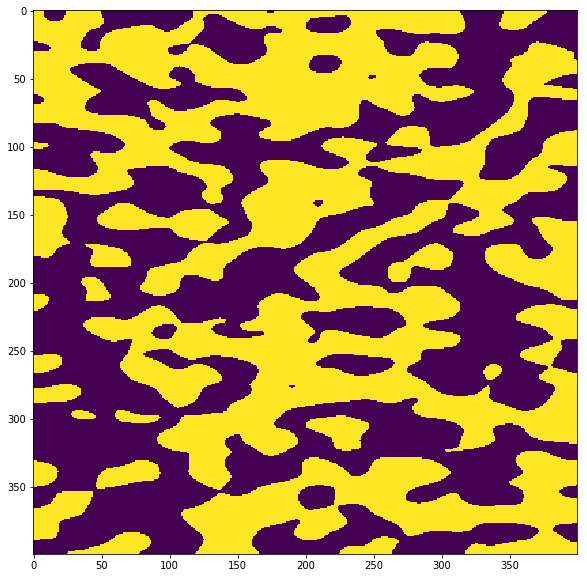

In [4]:
plt.figure(figsize=[10, 10])
fig = plt.imshow(im)

Determining chord-length distributions requires first adding chords to the image, which is done using the ``apply_chords`` function.  The following code applies chords to the image in the x-direction (along ``axis=0``), then applies them in the y-direction (``axis=1``).  The two images are then plotted using ``matplotlib``.  

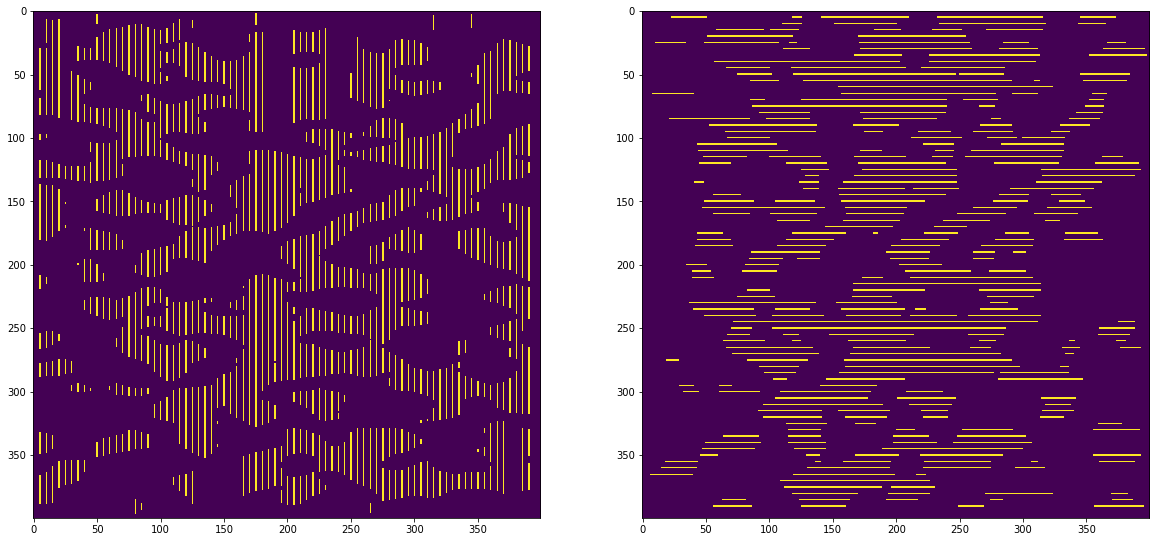

In [5]:
crds_x = ps.filters.apply_chords(im=im, spacing=4, axis=0)
crds_y = ps.filters.apply_chords(im=im, spacing=4, axis=1)
fig, ax = plt.subplots(1, 2, figsize=[20, 10])
ax[0].imshow(crds_x)
ax[1].imshow(crds_y)

Note that none of the chords touch the edge of the image.  These chords are trimmed by default since they are artificially shorter than they should be and would skew the results.  This behavior is optional and these chords can be kept by setting ``trim_edges==False``.

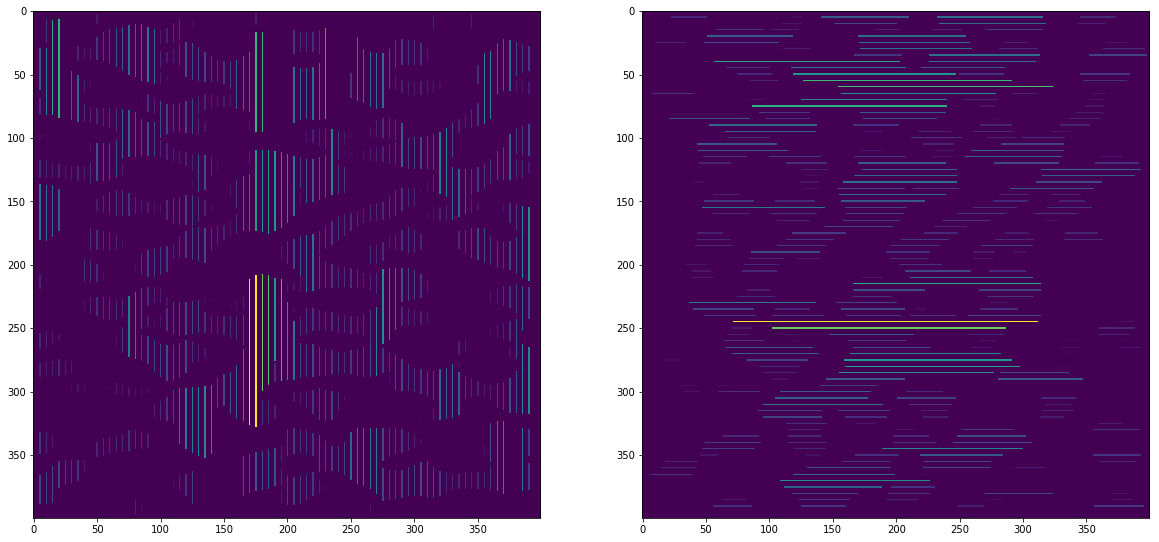

In [6]:
sz_x = ps.filters.region_size(crds_x)
sz_y = ps.filters.region_size(crds_y)
fig, ax = plt.subplots(1, 2, figsize=[20, 10])
ax[0].imshow(sz_x)
ax[1].imshow(sz_y)

In [7]:
data_x = ps.metrics.chord_length_distribution(crds_x, bins=25)
data_y = ps.metrics.chord_length_distribution(crds_y, bins=25)

Many of the functions in the ``metrics`` module return named tuples containing various arrays.  The advantage of the named tuple is that each array can be accessed by name, as attributes, such as ``data_x.pdf``.  To see all the available attributes (i.e. arrays) use the autocomplete function if your IDE, the following:

In [9]:
print(data_x._fields)

('L', 'pdf', 'cdf', 'relfreq', 'bin_centers', 'bin_edges', 'bin_widths')


Now we can print the results of the chord-length distribution as bar graphs:

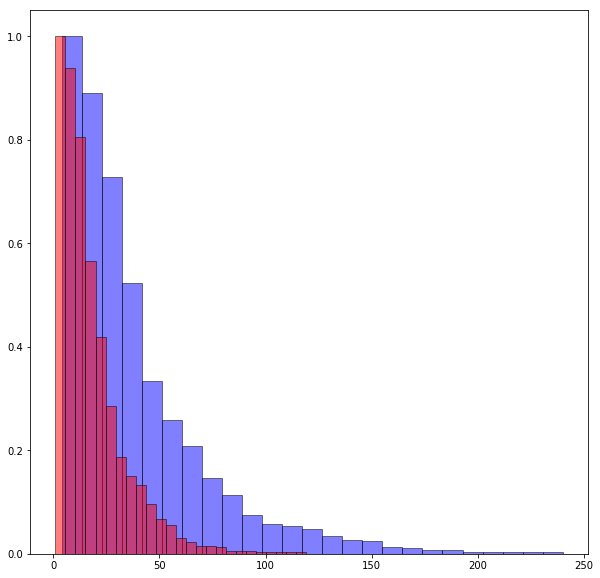

In [13]:
plt.figure(figsize=[10, 10])
bar = plt.bar(x=data_y.L, height=data_y.cdf, width=data_y.bin_widths, color='b', edgecolor='k', alpha=0.5)
bar = plt.bar(x=data_x.L, height=data_x.cdf, width=data_x.bin_widths, color='r', edgecolor='k', alpha=0.5)

The key point to see here is that the blue bars are for the y-direction, which was the elongated direction, and as expected they show a tendency toward longer chords.  

## Application to 3D images

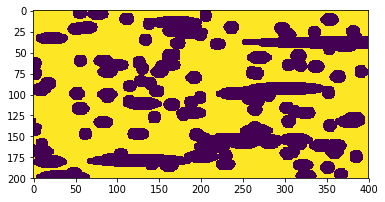

In [19]:
im = ps.generators.cylinders(shape=[200, 400, 400], radius=8, nfibers=200, )
plt.imshow(im[:, :, 100])

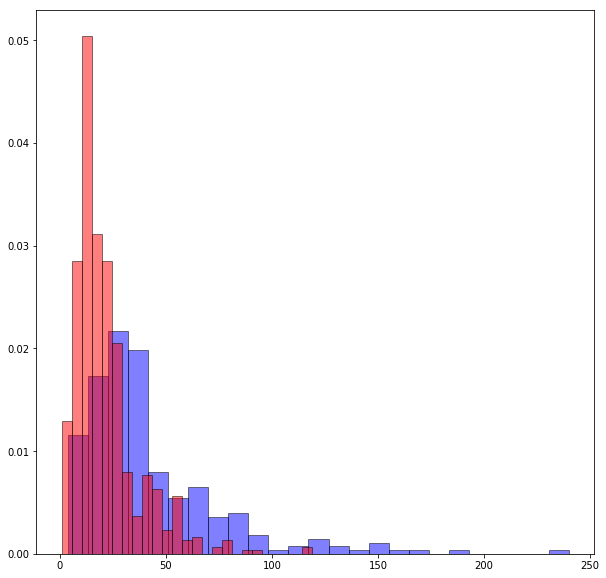

In [15]:
plt.figure(figsize=[10, 10])
bar = plt.bar(x=data_y.L, height=data_y.pdf, width=data_y.bin_widths, color='b', edgecolor='k', alpha=0.5)
bar = plt.bar(x=data_x.L, height=data_x.pdf, width=data_x.bin_widths, color='r', edgecolor='k', alpha=0.5)